# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv("keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39021.60
The current value of your 5.3 ETH is $7252.63


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [21]:
# Format current date as ISO format
today = pd.Timestamp(date.today(), tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-25 00:00:00-05:00  117.39  117.56  117.36  117.54  3977366  383.67   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-25 00:00:00-05:00  384.77  378.46  384.4  61090775

In [22]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [23]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [24]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto_value = my_btc_value + my_eth_value
total_share_value = my_spy_value + my_agg_value

amounts = {"amount": [total_crypto_value, total_share_value]}
assets = ['crypto', 'shares']

df_savings = pd.DataFrame(amounts, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,46274.226
shares,42728.000


<AxesSubplot:title={'center':'Compositon of Personal Savings'}, ylabel='amount'>

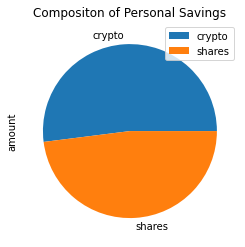

In [25]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Compositon of Personal Savings")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_share_value

# Validate saving health
if(total_savings > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
elif(total_savings == emergency_fund):
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [38]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
#start_date = pd.Timestamp('2016-01-25', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [39]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = '1D'

tickers = ['AGG', 'SPY']

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [40]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [41]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [42]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998008,0.994216,1.010012,1.010458,0.992255,0.996999,0.989612,0.992733,1.010339,1.000379,...,0.994580,0.992396,0.995668,1.000528,0.999595,1.000304,0.995170,1.011273,0.986261,1.007887
2,0.998920,0.985840,1.003405,1.010130,1.008707,0.993824,0.979500,1.006508,1.013782,0.998352,...,0.993073,0.991937,0.991084,1.006952,1.003826,0.996256,1.011614,1.012655,0.979566,1.014064
3,1.002869,1.002143,1.000552,1.016351,1.004479,0.993311,0.975794,1.005684,1.020338,1.001270,...,0.993941,0.993817,0.989880,1.007007,1.001535,1.006020,1.014183,1.012030,0.975065,1.026170
4,1.020124,1.005391,0.992812,1.013317,1.005529,0.990812,0.971916,1.011273,1.034136,0.985221,...,1.001323,0.985512,0.990146,1.009388,0.996279,1.006151,1.002065,1.014742,0.972255,1.029153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.776057,3.935538,4.478743,6.122240,4.656934,7.165309,16.423661,15.699969,3.619857,10.460119,...,10.002732,1.259745,5.256382,3.748683,4.626614,8.949541,11.542778,2.129303,2.239171,8.249224
7557,3.800598,3.924426,4.464271,6.197634,4.691495,7.165254,16.443548,15.629071,3.645759,10.578690,...,10.078280,1.262378,5.288255,3.746798,4.624458,9.039366,11.506147,2.127570,2.247247,8.296063
7558,3.744965,3.910271,4.436946,6.197887,4.671439,7.164559,16.462053,15.827864,3.646912,10.454950,...,10.049020,1.268075,5.248241,3.813251,4.627563,8.986586,11.587395,2.127800,2.226961,8.215220
7559,3.722665,3.905898,4.439348,6.180290,4.677151,7.167682,16.223144,15.741384,3.642636,10.441175,...,10.046609,1.265749,5.246655,3.812708,4.724508,8.932750,11.556296,2.119113,2.237148,8.197393


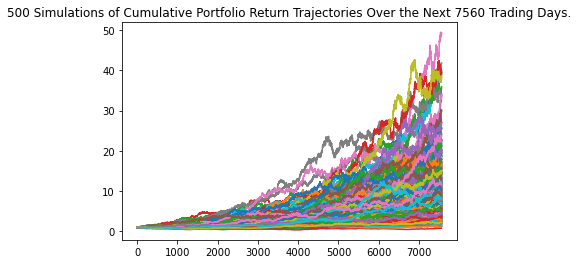

In [43]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

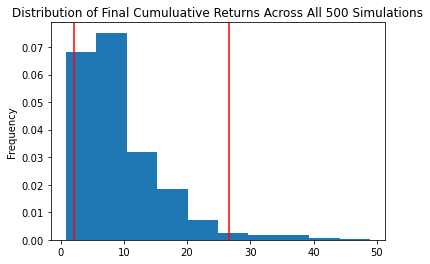

In [44]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30yr = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_30yr)

count           500.000000
mean              9.377131
std               6.788311
min               0.813175
25%               4.805105
50%               7.650558
75%              11.929864
max              48.954783
95% CI Lower      2.071758
95% CI Upper     26.681342
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_30yr[8]*initial_investment,2)
ci_upper = round(tbl_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41435.16 and $533626.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [47]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl_30yr[8]*initial_investment,2)
ci_upper = round(tbl_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $62152.73 and $800440.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [51]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002461,0.997689,0.997165,1.008231,0.997394,0.998630,0.991761,1.006878,1.001421,1.005307,...,0.997942,1.004322,1.000681,0.999703,1.008081,1.005451,1.006008,1.003973,1.010782,0.990419
2,0.999889,0.996180,0.996839,1.006051,1.008821,1.005500,0.982857,1.013088,1.003050,0.983869,...,1.000226,1.019236,1.003526,1.009048,1.011768,1.002693,0.999190,1.006970,1.016490,0.985224
3,0.996617,1.005071,0.997575,0.999217,1.019220,1.009564,0.987559,1.028751,1.009245,1.000242,...,0.990415,1.019390,1.011717,1.010594,1.021858,1.015642,1.008122,0.998255,1.028629,0.974422
4,1.004143,0.999648,0.992231,1.010400,1.006688,1.007130,0.975432,1.040861,1.006622,0.993157,...,0.987617,1.023937,1.010868,1.012170,1.031619,1.018629,1.011202,0.995935,1.030228,0.971703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.977655,1.574932,1.591324,1.736283,2.033383,1.915249,1.474668,1.120540,1.454028,1.416610,...,1.322769,1.330526,0.985327,1.723943,1.455494,1.451028,1.238114,1.869536,1.595591,1.208707
1257,0.972007,1.594104,1.590573,1.733981,2.021820,1.935567,1.478490,1.113173,1.466245,1.439439,...,1.316377,1.325810,1.001241,1.729014,1.449133,1.448139,1.226297,1.841025,1.610186,1.207200
1258,0.972254,1.589950,1.607199,1.737953,2.032928,1.945565,1.481081,1.116193,1.457505,1.438032,...,1.309529,1.339478,0.985825,1.739087,1.455175,1.448076,1.206397,1.846919,1.611549,1.204149
1259,0.969127,1.597058,1.601859,1.734304,2.019666,1.943195,1.486218,1.123821,1.443913,1.439644,...,1.312866,1.347182,0.988849,1.735331,1.453275,1.448740,1.201631,1.833634,1.597948,1.193387


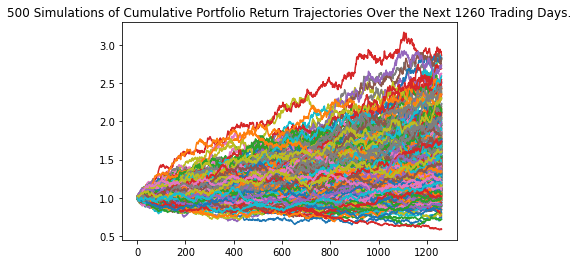

In [52]:
# Plot simulation outcomes
line_plot = MC_5_year.plot_simulation()

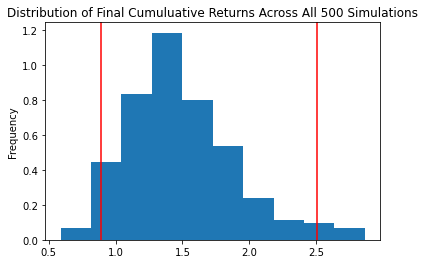

In [53]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_year.plot_distribution()

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.490797
std               0.408145
min               0.588722
25%               1.197409
50%               1.433714
75%               1.706210
max               2.864042
95% CI Lower      0.889123
95% CI Upper      2.505706
Name: 1260, dtype: float64


In [58]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5yr[8]*initial_investment,2)
ci_upper_five = round(tbl_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53347.35 and $150342.37


### Ten Years Retirement Option

In [66]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.5, 0.5],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [67]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999647,0.995801,1.005404,1.002103,1.003677,0.998397,0.993014,1.000542,0.987569,1.004285,...,1.000484,1.006315,1.002270,1.007556,1.007643,1.005687,1.008162,1.002975,1.002807,1.003876
2,0.998308,0.995015,1.016228,1.010820,1.013524,1.000913,0.995285,0.988996,0.988068,1.011280,...,0.990832,1.003841,1.002274,1.008009,0.995111,0.999972,1.008286,0.994705,1.000359,1.005365
3,0.997497,0.994252,1.020196,1.010091,1.004765,1.004555,0.986180,0.992931,0.992823,1.002719,...,0.999893,1.016233,1.008623,1.007088,0.999252,0.999554,1.008972,0.994580,0.996291,1.012290
4,0.990440,0.994772,1.022769,1.018970,1.000153,1.011087,0.979018,0.991262,0.995400,1.001932,...,1.000223,1.013217,1.003731,1.005684,0.995409,0.998064,1.017210,0.989694,0.989586,1.010828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.458427,1.397833,1.455962,2.991443,1.873225,2.161808,2.476794,2.256727,1.455668,1.367975,...,1.536893,1.761468,1.230595,1.527958,1.853356,1.522773,1.795038,1.490445,1.916889,1.778858
2517,1.457382,1.388602,1.444435,3.013779,1.875907,2.187791,2.445528,2.264375,1.438570,1.374255,...,1.530383,1.759940,1.222694,1.532613,1.839076,1.525106,1.801175,1.494932,1.918056,1.791008
2518,1.463546,1.390126,1.431730,3.003849,1.894398,2.184655,2.464463,2.256170,1.459852,1.373455,...,1.533839,1.768237,1.228802,1.552010,1.845056,1.515713,1.788396,1.492337,1.906843,1.794726
2519,1.474938,1.386699,1.418036,3.004108,1.892241,2.185758,2.449679,2.250942,1.467560,1.378812,...,1.539391,1.775250,1.222965,1.567760,1.862402,1.506610,1.792492,1.491903,1.904811,1.804714


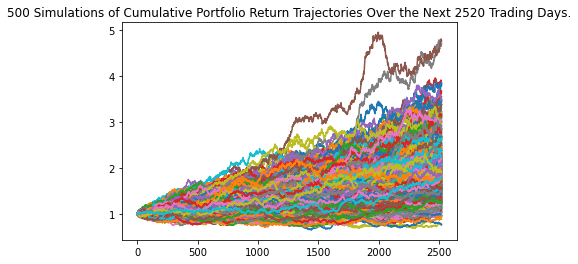

In [68]:
# Plot simulation outcomes
line_plot = MC_10_year.plot_simulation()

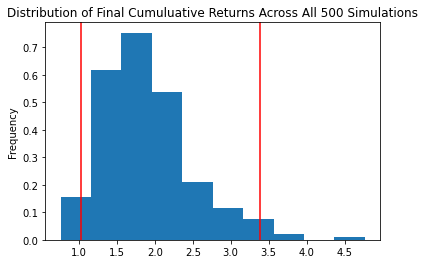

In [69]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_year.plot_distribution()

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              1.905014
std               0.597905
min               0.757789
25%               1.499632
50%               1.799073
75%               2.200652
max               4.766461
95% CI Lower      1.029724
95% CI Upper      3.378797
Name: 2520, dtype: float64


In [71]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10yr[8]*initial_investment,2)
ci_upper_ten = round(tbl_10yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61783.42 and $202727.82
